# Ch2 End-to-End Machine Learning Project

In [1]:
import pandas as pd
import numpy as np

# to make output stable across runs
np.random.seed(42)

# to plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## 1 Look at the Big Picture

### Frame the Problem (解决什么问题)

The first thing is to ask your boss what exactly is the business objective and how the company expect to use and benefit from this model; building a model is probably not the end goal.This is important because it will determine how u frame the problem, what algorithms u will select, what performance measure u will use to evaluate your model, and how much effort u should spend tweaking it.

### Select a Performance Measure (选择一个性能指标)

### Check the Assumptions (验证我们的假设)

It is good practice to list and verify the assumptions that were made so far (by u or others); this can catch serious issues early on.

## 2 Get the Data

### Create the Workspace

### Download the Data

### Take a Quick look at the Data Structure

In [2]:
# Load the data
housing = pd.read_csv("housing.csv")
# Take a look at the top five rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Take a look at the last five rows
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
# Get a quick description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> There are 20640 instances in the dataset, which means that it is fairly samll by ML standards（按机器学习的标准）.

The `total_bedrooms` attribute has only 20433 non-null values, meaning that 207 rows are missing this feature.

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# Show a summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another way to get a feel of the type of data u are dealing with is to plot a histogram for each numnerical attribute.

**Histogram** shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).

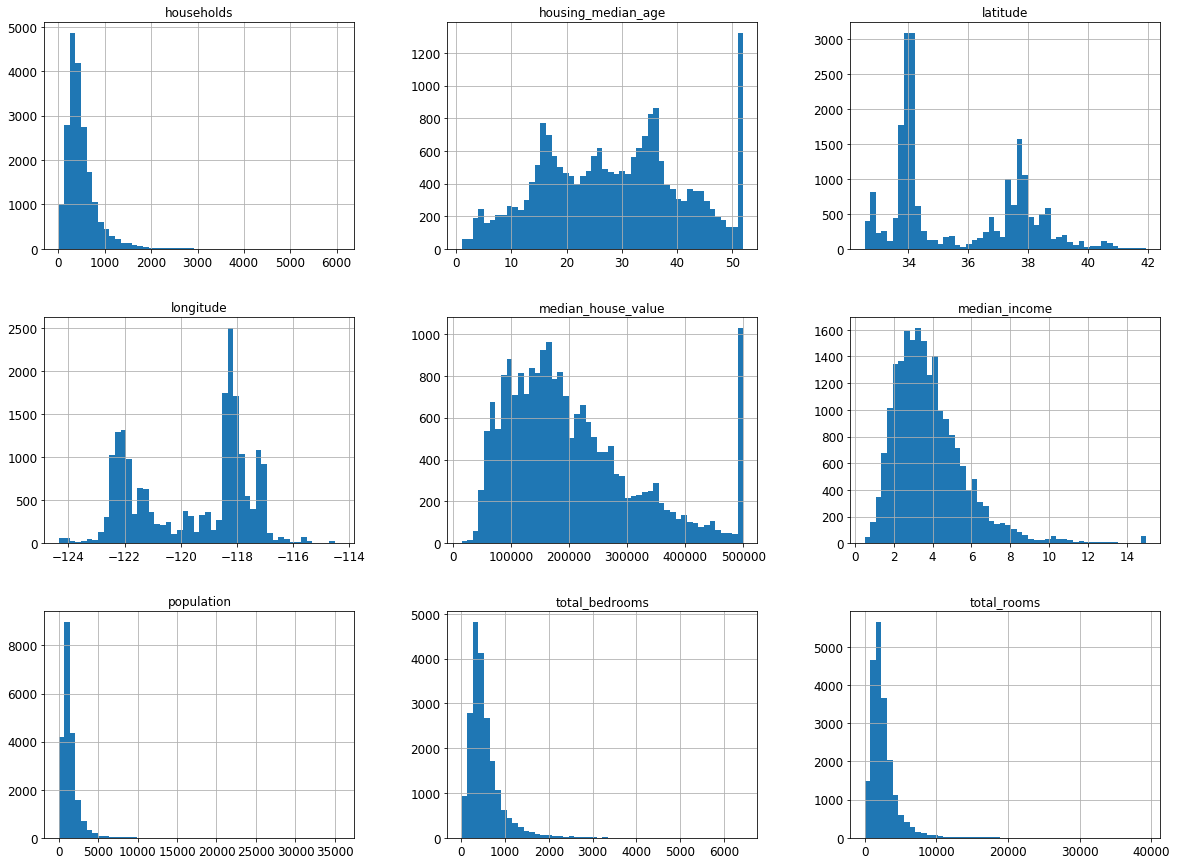

In [7]:
housing.hist(bins=50, figsize=( 20, 15))
plt.show()

Using Jupyter's magic command `matplotlib inline` indicates telling Jupyter to set up Matplotlib so it uses the Jupyter's own backend. Plots are then rendered within the notebook itself. Note that calling `show()` is optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is executed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262321557B8>,
      dtype=object)

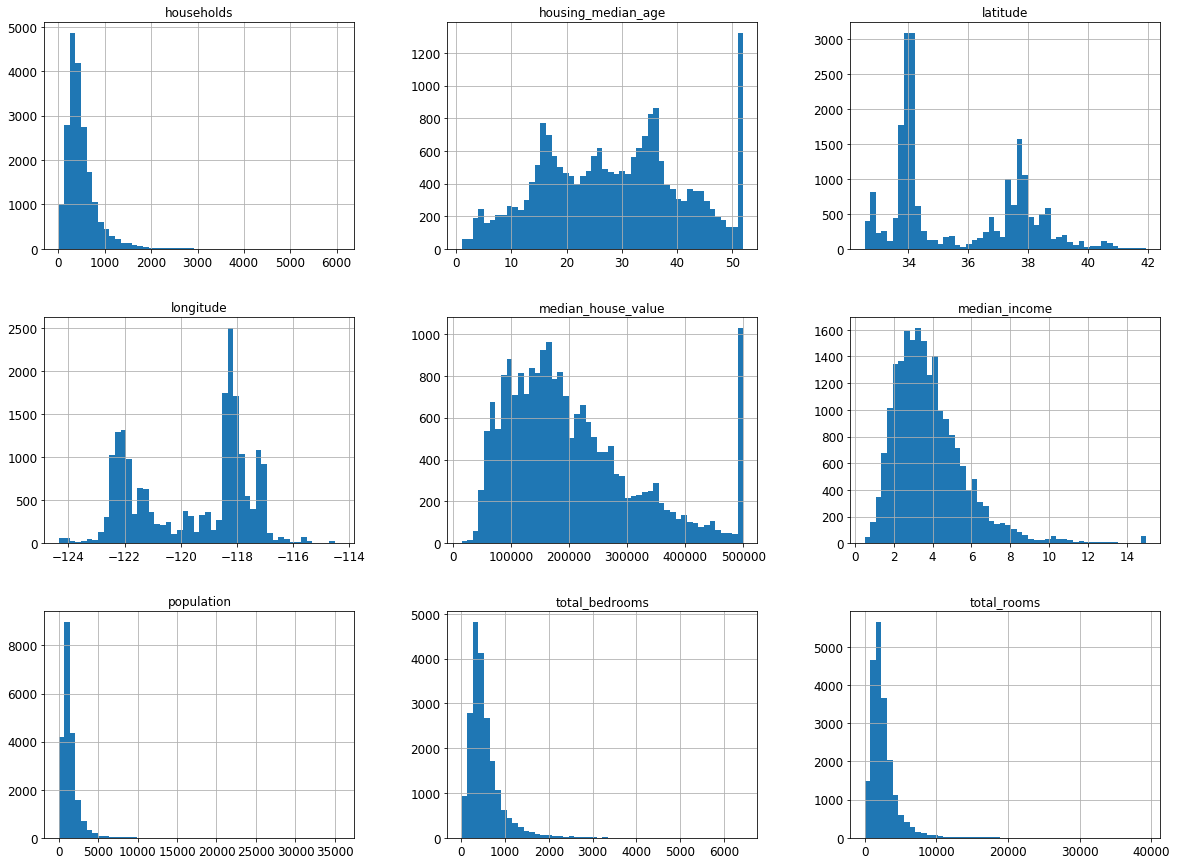

In [8]:
# Don't use `plt.show()`
housing.hist(bins=50, figsize=( 20, 15))

<font color=red size=2>**Before u look at the data any further, u need to create a test set, put it aside, and never look at it!**</font>

### Create a Test Set

If the median income is a very important attribute to predict median housing prices, look at the median income histogram more closely.

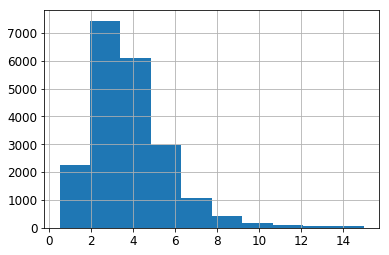

In [9]:
housing["median_income"].hist()

**To ensure that the test set is representative of the various categories of incomes in the whole dataset.**

Since the median income is a <font color=red>continuous numerical attribute</font>, u first need to create an income <font color=red>category attribute</font>.

In [10]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [11]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

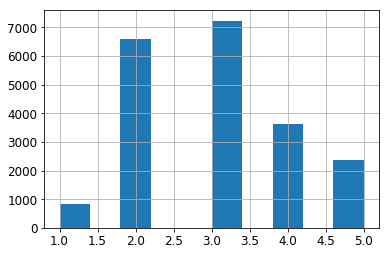

In [12]:
housing["income_cat"].hist()

**<font color=red>Stratified sampling</font> maintains the proportion of the `income_cat`.**

In [13]:
# Do stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

**See if this worked as expected.**

In [14]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [15]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Look at the income category proportions in the full housing dataset.

In [16]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

<font color=red>**Purely random sampling**</font>

In [17]:
# Purely random sampling
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(
    housing, test_size=0.2, random_state=42)[:2]

<font color=red>Sampling bias comparsion of stratified versus purely random sampling</font>

Compares the income category proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling.

In [18]:
compare_props = pd.DataFrame({
    "Overall": housing["income_cat"].value_counts() / len(housing),
    "Stratified": strat_test_set["income_cat"].value_counts() / len(strat_test_set),
    "Random": test_set["income_cat"].value_counts() / len(test_set)
}).sort_index()
compare_props["Rand. %error"] = 100 * \
    compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Stratified. %error"] = 100 * \
    compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Random,Stratified,Rand. %error,Stratified. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


> 代码重复较多的地方可以写成函数。  
>The test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed (歪斜的，曲解的).

In [19]:
def income_cat_prop(data):
    return data["income_cat"].value_counts() / len(data)


compare_props = pd.DataFrame({
    "Overall": income_cat_prop(housing),
    "Stratified": income_cat_prop(strat_test_set),
    "Random": income_cat_prop(test_set)
}).sort_index()
compare_props["Rand. %error"] = 100 * \
    compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * \
    compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Random,Stratified,Rand. %error,Strat. %error
1.0,0.039826,0.040213,0.039729,0.973236,-0.243309
2.0,0.318847,0.324370,0.318798,1.732260,-0.015195
3.0,0.350581,0.358527,0.350533,2.266446,-0.013820
4.0,0.176308,0.167393,0.176357,-5.056334,0.027480
5.0,0.114438,0.109496,0.114583,-4.318374,0.127011


Last, remove the income_cat attribute so the data is back to its original state.

strat_train_set and strat_test_set excluding the income_cat attribure.

In [20]:
for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

## 3 Discover and Visualize the Data to Gain Insights

<font color=red>**Make sure u have put the test set aside and u'are only exploring the training set**.</font>

Also, if the training set is very large, u may want to sample an exploration set, to make manipulations easy and fast.

In [21]:
housing = strat_train_set.copy()

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


### Visualize Geographical Data

since there is geographical info ( latitude adn longitude), it's a good idea to create a scatterplot of districts to visualize the data.

Text(0.5,1,'A geographical scatterplot of the data')

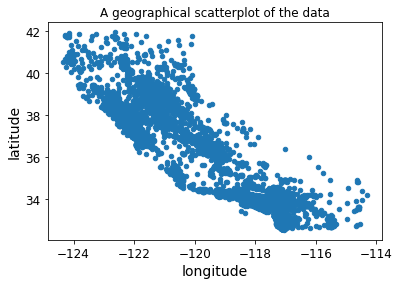

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.title("A geographical scatterplot of the data")

Text(0.5,1,'A geographical scatterplot of the data')

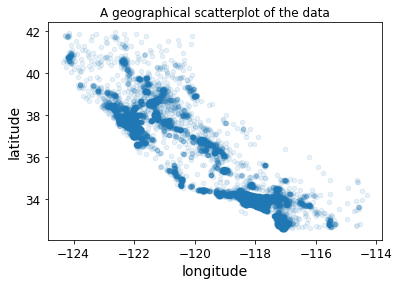

In [24]:
# Set the alpha option to 0.1 to visualize a high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.title("A geographical scatterplot of the data")

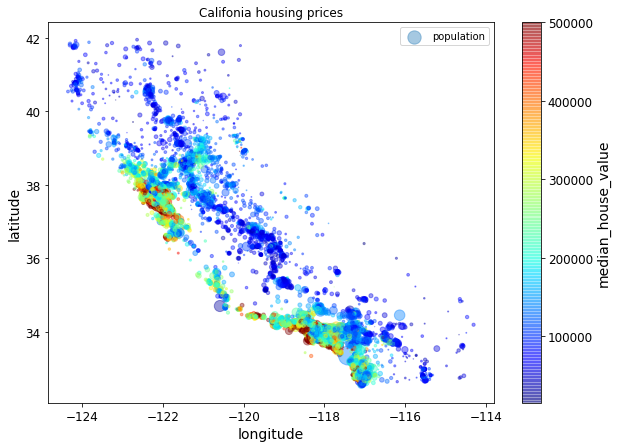

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=.4,
    s=housing["population"] / 100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    figsize=(10, 7), sharex=False)
plt.legend()
plt.title("Califonia housing prices")
plt.show()

> option `s`: the radius of each circle represents the district's population  
> option `c`: the color represents the price  
> option `cmap`: a predefined color map called *jet*, which ranges from blue (low values) to red (high prices)

### Looking for Correlations

#### 1 the first the method to chech for correlation

Since the dataset is not too large, compute the <font color=red>standard correlation coefficient</font> (also called <font color=red>Pearson's r</font>) between every pair of attributes using the `DataFrame.corr()` method:

In [26]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


Have a look at how much each attribute correlates with the median house value:

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### 2 the second method to check for correlation

In [28]:
from pandas.plotting import scatter_matrix

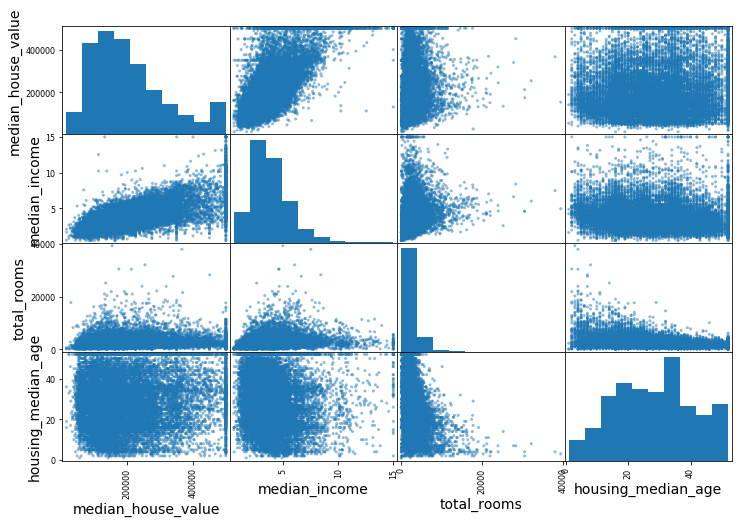

In [29]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

The most promising attribute to predict the median house value is the median income, so zoom in on their correlation scatterplot.

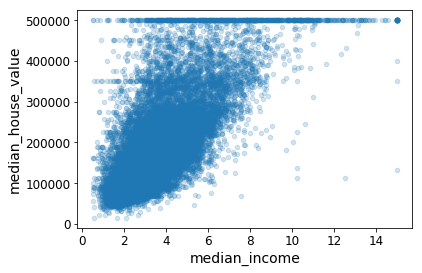

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)

### Experimenting with Attribute Combinations

try out various attribute combinations

In [31]:
# Create some new attributes
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / \
    housing["total_rooms"]
housing["population_per_household"] = housing["population"] / \
    housing["households"]

In [32]:
# Look at the correlation matrix
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.028345,0.095603,-0.000410
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,0.107621,-0.116884,0.005420
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.147186,0.136788,0.015031
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.127519,-0.192606,-0.024810
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.000377,0.086960,-0.028370
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,-0.074692,0.037778,0.076225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,-0.083009,0.067162,-0.027416
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.311563,-0.624674,0.021822
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.146285,-0.259984,-0.021985
rooms_per_household,-0.028345,0.107621,-0.147186,0.127519,0.000377,-0.074692,-0.083009,0.311563,0.146285,1.000000,-0.398546,-0.005314


In [33]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

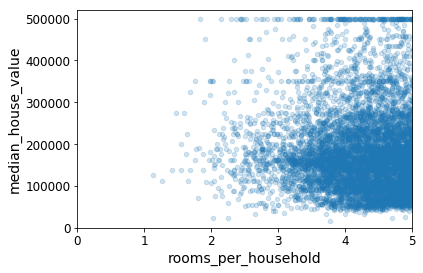

In [34]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

## 4 Prepare the Data for Machine Learning Algorithms

**prepare the data for ML algorithms**

Instead of just doing this manually, u should write functions to do that.

In [35]:
# Separate the predictors and the labels
housing = strat_train_set.drop("median_house_value", axis=1)
# housing = strat_train_set.drop(columns="median_house_value")
housing_labels = strat_train_set["median_house_value"].copy()

### Data cleaning

In [36]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


<span style="color: red">three options to deal with missing values:</span>
1. Get rid of the corresponding districts
2. Get rid of the whole attribute
3. Set the values to some value (zero, the mean, the median, etc.)

```python
# Option 1: delete the corresponding rows
housing.dropna(subset=["total_bedrooms"])
# Option 2: delete the corresponding columns
housing.drop("total_bedrooms", axis=1)
# Option 3: replace the missing values
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)
```

In [37]:
# Look at the incomplete rows
samples_incomplete_rows = housing[housing.isnull().any(axis=1)]
samples_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [38]:
# Option 1: delete the corresponding rows
samples_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [39]:
# Option 2: delete the corresponding columns
samples_incomplete_rows.drop(columns="total_bedrooms").head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


> `samples_incomplete_rows.dropna(axis=1)`代码也可以，因为samples_incomplete_rows只有一列缺失值。

In [40]:
# Option 3: replace the missing values
median = housing["total_bedrooms"].median()
samples_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
samples_incomplete_rows.head()

C:\Users\libin\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


**If u choose option 3, u should compute the median value on the training set, and use it to fill the missing values in the training set, but also don't forget to save the median value that u have computed. U will need it later to replace missing values in the test set when u want to evaluate your system, and also once the system goes live to replace missing values in new data.**

The [**Imputer**](http://scikit-learn.org/stable/modules/preprocessing.html#imputation) class provides basic strategies for imputing missing values, either using *the mean*, *the median* or *the most frequent value* of the row or column in which the missing values are located. This class also allows for different missing values encodings.

In [41]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [42]:
housing_num = housing.drop(columns="ocean_proximity")
# Alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [43]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [45]:
imputer.strategy

'median'

Check that this is the same as manually computing the median of each attribute:

In [46]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

Transform the training set:

In [47]:
# Transform the training set
X = imputer.transform(housing_num)

Put it back into a pandas DataFrame:

In [48]:
# Put it back into a pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.loc[samples_incomplete_rows.head().index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [49]:
# Put it back into a pandas DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


### Handling Text and Categorical Attributes

Scikit-Learn provides a transformer for converting text labels to numbers called [**lableEncoder**](http://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets).

LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.

In [50]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [51]:
np.unique(housing_cat.values)

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [52]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = label_enc.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [53]:
# Holds the label for each class
label_enc.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [54]:
housing_cat.tail()

6563        INLAND
12053       INLAND
13908       INLAND
11159    <1H OCEAN
15775     NEAR BAY
Name: ocean_proximity, dtype: object

U can look at the mapping that this encoder has learned using the `classes_` attribute ('1H OCEAN' is mapped to 0, 'INLAND' is mapped to 1, etcl.)

Scikit-Learn provides a [**OneHotEncoder**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) encoder to **convert integer categorical values into one-hot vectors**.

In [55]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder(sparse=False)
housing_cat_1hot = one_hot_enc.fit_transform(
    housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the [**LabelBinarizer**](http://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets) class.

In [56]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
housing_cat_1hot = label_binarizer.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Custom Transfomers

Write your own  transforms for tasks such as custom operations or combining specific attributes.

All u need is to create a class and implement three methods.

For example, here is a small transfomer class that adds the combined attributes discussed earlier:

In [57]:
# Create a custom transform to add extra attributes
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bed_rooms_ix, population_ix, household_ix = 3, 4, 5, 6


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_rooms = X[:, bed_rooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_rooms]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [58]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + \
    ["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


### Feature Scaling

+ **Min-max scaling** (many people call this **normalization**): **MinMaxScaler**


+ **Standardization**: **StandardScaler**

As with all the transformations, it's important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can u use them to transform the training set and the test set (and new data).

### Transformations Pipelines

In [59]:
# A small pipeline for the numerical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([("imputer", Imputer(strategy="median")),
                         ("attribs_adder", CombinedAttributesAdder()),
                         ("std_scaler", StandardScaler())])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr[:3]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ]])

Add a transfromer to just select a subset of the pandas DataFrame columns:

In [60]:
# Create a class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrame yet
from sklearn.base import BaseEstimator, TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

Let's join all these components into a big pipeline that will preprocess both the numerical and categorical features:

In [61]:
housing_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214


In [62]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [63]:
# 这个类主要是解决 LabelBinarizer() 在 pipeline 运行出错的问题# 这个类主要是
# cr：https://stackoverflow.com/questions/46162855/fit-transform-takes-2-positional-arguments-but-3-were-given-with-labelbinarize


class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X, y=None):
        return self.encoder.transform(X)

In [64]:
# alternative solution
# cr.https://github.com/scikit-learn/scikit-learn/pull/7375/files#diff-1e175ddb0d84aad0a578d34553f6f9c6


class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)

    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)

    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

In [65]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizerPipelineFriendly()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

# Run the whole pipeline simply
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

换一种简单的方法：

In [66]:
num_pipeline = Pipeline([('imputer', Imputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler())])

housing_prepared = np.c_[num_pipeline.fit_transform(housing_num.values), label_binarizer.fit_transform(housing_cat)]
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [69]:
housing_prepared.shape

(16512, 16)

In [70]:
housing.shape

(16512, 9)

## 5 Select and Train a Model

### Training and Evaluating on the Training Set

- Train a LinearRegression model

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Create a defined dataset *some_data*, clean up and prepare *some_data*:

In [72]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_num = some_data.drop("ocean_proximity", axis=1)
some_data_cat = some_data["ocean_proximity"]

some_data_prepared = np.c_[num_pipeline.transform(
    some_data_num.values), label_binarizer.transform(some_data_cat)]
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [73]:
# Alternatively
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
         0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936,  0.21768338, -0.03353391,
        -0.83628902,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.46531516, -0.09240499,
         0.4222004 ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.01706767,  0.31357576, -0.29052016, -0.36276217, -0.39675594,
         0.03604096, -0.38343559, -1.04556555, -0.07966124,  0.08973561,
        -0.19645314,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.49247384, -0.65929936, -0

In [74]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


Compare against the actual values:

In [75]:
print("Actual labels: \n", some_labels)

Actual labels: 
 17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [76]:
print("Actual labels:", list(some_labels))

Actual labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [77]:
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [78]:
from sklearn.metrics import mean_squared_error

# Measure this regression model's RMSE on the whole training set
housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

> Apparently, this is a example of model underfitting the training set. When it happens it can mean that the features do not provide enough info to make good predicions, or the model is not powerful enough.

- Train a DecisionTreeRegressor model

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [80]:
# Evaluate the Decision Tree model on the training set
housing_pred = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

> No error at all? It is much more likely that the model has badly overfit the data. U don't want to touch the test set until u are ready to launch a model u are confident about, so u need to use part of the training set for training, and part for model validation.

### Better Evaluating Using Cross_Validation

+ **10-fold cross-validation for the Decisin Tree model:**

In [81]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
tree_rmse_scores = np.sqrt(-dt_scores)

In [83]:
# Display scores
print("Scores: ", tree_rmse_scores)
print("\nMean: ", tree_rmse_scores.mean())
print("\nStandard deviation: ", tree_rmse_scores.std())

Scores:  [69288.32438733 67080.07112981 72209.66110676 68913.41105018
 71190.4223565  75327.88101245 71166.62760961 71862.09342313
 77435.24536041 70228.20342161]

Mean:  71470.19408578103

Standard deviation:  2888.733663310638


+ **10-fold cross-validation for the Linear Regression model:**

In [84]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10,
                             n_jobs=-1)
lin_mse_scores = np.sqrt(-lin_scores)

# Display scores
print("Scores: ", lin_mse_scores)
print("\nMean: ", lin_mse_scores.mean())
print("\nStandard deviation: ", lin_mse_scores.std())

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]

Mean:  69052.46136345083

Standard deviation:  2731.6740017983466


That is right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

+ **10-fold cross-validation for the RandomForest Regression model:**

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [86]:
# Evaluate the Randoms Forest on training set
housing_pred = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21941.911027380233

In [87]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10,
                                n_jobs=-1)
forest_rmse_scores = np.sqrt(-forest_scores)

# Display scores
print("Scores: ", forest_rmse_scores)
print("\nMean: ", forest_rmse_scores.mean())
print("\nStandard deviation: ", forest_rmse_scores.std())

Scores:  [51650.94405471 48920.80645498 52979.16096752 54412.74042021
 50861.29381163 56488.55699727 51866.90120786 49752.24599537
 55399.50713191 53309.74548294]

Mean:  52564.19025244012

Standard deviation:  2301.873803919754


+ **SVR**

In [88]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111094.6308539982

## 6 Fine-Tune Your model

Fine-tune the shortlist of promissing models.

### Grid Search

Search for the best combination of hyperparameter values for the RandomForestRegressor:

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# Train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

The best hyperparameter combination found:

In [90]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [91]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

Look at the score of each hyperparameter combination tested during the grid search:

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63647.85444595992 {'max_features': 2, 'n_estimators': 3}
55611.50159876327 {'max_features': 2, 'n_estimators': 10}
53370.06407363344 {'max_features': 2, 'n_estimators': 30}
60959.138858487866 {'max_features': 4, 'n_estimators': 3}
52740.58416665252 {'max_features': 4, 'n_estimators': 10}
50374.14214614731 {'max_features': 4, 'n_estimators': 30}
58661.2866461823 {'max_features': 6, 'n_estimators': 3}
52009.973979776936 {'max_features': 6, 'n_estimators': 10}
50154.11777368494 {'max_features': 6, 'n_estimators': 30}
57865.36168014446 {'max_features': 8, 'n_estimators': 3}
51730.07550866553 {'max_features': 8, 'n_estimators': 10}
49694.85143334442 {'max_features': 8, 'n_estimators': 30}
62874.407393096284 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54643.49980834466 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59437.89228588419 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52735.358293621044 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [93]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.075425,0.001597,-4.051049e+09,-1.106013e+09,NaN,2,3,"{'max_features': 2, 'n_estimators': 3}",18,-3.850668e+09,...,-4.194135e+09,-1.116843e+09,-3.906732e+09,-1.112813e+09,-4.169669e+09,-1.129842e+09,0.010475,0.001955,1.431223e+08,2.173798e+07
1,0.278030,0.006249,-3.092639e+09,-5.819353e+08,NaN,2,10,"{'max_features': 2, 'n_estimators': 10}",11,-3.052380e+09,...,-3.124982e+09,-5.780873e+08,-2.865117e+09,-5.713421e+08,-3.169914e+09,-5.797944e+08,0.062021,0.007653,1.306954e+08,7.584886e+06
2,0.981382,0.035153,-2.848364e+09,-4.396234e+08,NaN,2,30,"{'max_features': 2, 'n_estimators': 30}",9,-2.692176e+09,...,-2.943808e+09,-4.374429e+08,-2.619893e+09,-4.374715e+08,-2.968460e+09,-4.451903e+08,0.009979,0.003060,1.604534e+08,2.883885e+06
3,0.156211,0.009374,-3.716017e+09,-9.850011e+08,NaN,4,3,"{'max_features': 4, 'n_estimators': 3}",16,-3.729600e+09,...,-3.736527e+09,-9.172986e+08,-3.404974e+09,-1.035901e+09,-3.914186e+09,-9.711998e+08,0.000003,0.007654,1.690029e+08,4.047487e+07
4,0.534616,0.009375,-2.781569e+09,-5.160154e+08,NaN,4,10,"{'max_features': 4, 'n_estimators': 10}",8,-2.667093e+09,...,-2.891599e+09,-4.960301e+08,-2.613393e+09,-5.422542e+08,-2.949550e+09,-5.158794e+08,0.020694,0.007655,1.278498e+08,1.498960e+07
5,1.511676,0.043803,-2.537554e+09,-3.878685e+08,NaN,4,30,"{'max_features': 4, 'n_estimators': 30}",3,-2.387199e+09,...,-2.663178e+09,-3.789712e+08,-2.397951e+09,-4.036920e+08,-2.649850e+09,-3.846171e+08,0.011691,0.006279,1.209935e+08,8.424973e+06
6,0.208870,0.004723,-3.441147e+09,-9.030212e+08,NaN,6,3,"{'max_features': 6, 'n_estimators': 3}",14,-3.119576e+09,...,-3.587747e+09,-9.360639e+08,-3.331544e+09,-9.025026e+08,-3.577062e+09,-8.612945e+08,0.011170,0.005739,1.884229e+08,2.639683e+07
7,0.696710,0.010638,-2.705037e+09,-5.014210e+08,NaN,6,10,"{'max_features': 6, 'n_estimators': 10}",6,-2.553481e+09,...,-2.762945e+09,-4.996537e+08,-2.519522e+09,-4.989516e+08,-2.906270e+09,-5.063617e+08,0.013029,0.005711,1.464963e+08,3.357661e+06
8,2.081750,0.040617,-2.515436e+09,-3.840197e+08,NaN,6,30,"{'max_features': 6, 'n_estimators': 30}",2,-2.371924e+09,...,-2.607962e+09,-3.805596e+08,-2.351220e+09,-3.856159e+08,-2.662399e+09,-3.904866e+08,0.018773,0.007652,1.283580e+08,3.796810e+06
9,0.262199,0.004721,-3.348400e+09,-8.884890e+08,NaN,8,3,"{'max_features': 8, 'n_estimators': 3}",13,-3.351347e+09,...,-3.396841e+09,-8.596460e+08,-3.131753e+09,-8.893698e+08,-3.509451e+09,-9.146734e+08,0.006958,0.005736,1.226683e+08,2.730057e+07


### Randomized Search

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                n_jobs=-1, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026236CD2A20>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026236CD2EB8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [95]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49147.15241724505 {'max_features': 7, 'n_estimators': 180}
51396.876896929905 {'max_features': 5, 'n_estimators': 15}
50797.05737322649 {'max_features': 3, 'n_estimators': 72}
50840.744513982805 {'max_features': 5, 'n_estimators': 21}
49276.17530332962 {'max_features': 7, 'n_estimators': 122}
50775.46331678437 {'max_features': 3, 'n_estimators': 75}
50681.383924974936 {'max_features': 3, 'n_estimators': 88}
49612.152530468346 {'max_features': 5, 'n_estimators': 100}
50473.01751424941 {'max_features': 3, 'n_estimators': 150}
64458.25385034794 {'max_features': 5, 'n_estimators': 2}


### Ensemble Methods

Another way to fine-tune system is to try to combine the models that perform best. The group (or 'ensemble') will often perform better than the best individual model, especially if the individual models make very different types of errors.

### Analyze the Best Models and Their Errors

In [96]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [97]:
rnd_search.best_estimator_.feature_importances_

array([7.24699052e-02, 6.38080322e-02, 4.27504395e-02, 1.65343807e-02,
       1.56100762e-02, 1.60929106e-02, 1.52149598e-02, 3.45178404e-01,
       5.74445360e-02, 1.08468449e-01, 7.05907498e-02, 8.77441303e-03,
       1.60563229e-01, 6.10403994e-05, 3.08961266e-03, 3.34886200e-03])

In [98]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

Display these importance scores next to their corresponding attributes names:

In [106]:
extra_attribs = ["rooms_per_household",
                 "population_per_household", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["label_binarizer"]
cat_attribs = list(cat_encoder.classes_)
attribs = num_attribs + extra_attribs + cat_attribs
sorted(zip(feature_importances, attribs), reverse=True)

[(0.3661589806181342, 'median_income'),
 (0.1647809935615905, 'INLAND'),
 (0.10879295677551573, 'population_per_household'),
 (0.07334423551601242, 'longitude'),
 (0.0629090704826203, 'latitude'),
 (0.05641917918195401, 'rooms_per_household'),
 (0.05335107734767581, 'bedrooms_per_room'),
 (0.041143798478729635, 'housing_median_age'),
 (0.014874280890402767, 'population'),
 (0.014672685420543237, 'total_rooms'),
 (0.014257599323407807, 'households'),
 (0.014106483453584102, 'total_bedrooms'),
 (0.010311488326303787, '<1H OCEAN'),
 (0.002856474637320158, 'NEAR OCEAN'),
 (0.00196041559947807, 'NEAR BAY'),
 (6.028038672736599e-05, 'ISLAND')]

With this info, u may want to try dropping some of the less useful features (e.g., apparently only on *ocean_proximity* category is really useful, so u could try dropping the others).

### Evaluate Your System on the Test Set

Now it is the time to evaluate the final model on the test set.

In [107]:
# Transform test set
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_num = X_test.drop("ocean_proximity", axis=1)
X_test_cat = X_test["ocean_proximity"]

X_test_prepared = np.c_[num_pipeline.transform(X_test_num.values),
                        label_binarizer.transform(X_test_cat)]
X_test_prepared

array([[ 0.59238393, -0.71074948,  0.02758786, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8571457 , -0.87445443,  0.8228579 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26268061, -0.66865392, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54242889, -0.68268578,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12690297, -0.77155418, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33261768,  0.53808541, -0.76768218, ...,  0.        ,
         0.        ,  0.        ]])

In [109]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared

array([[ 0.59238393, -0.71074948,  0.02758786, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8571457 , -0.87445443,  0.8228579 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26268061, -0.66865392, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54242889, -0.68268578,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12690297, -0.77155418, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33261768,  0.53808541, -0.76768218, ...,  0.        ,
         0.        ,  0.        ]])

In [110]:
final_pred = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

47766.00396643308

Compute a 95% confidence interval for the test RMSE:

In [111]:
from scipy import stats

confidence = 0.95
squared_error = (final_pred - y_test) ** 2
mean = squared_error.mean()
m = len(squared_error)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_error),
                         scale=stats.sem(squared_error)))

array([45720.21311746, 49727.70236334])

Compute the interval manually like this:

In [112]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_error.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45720.21311746024, 49727.70236333663)

Alternatively, use a z-score rather the t-scores:

In [113]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_error.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45720.82652240277, 49727.13838489935)

## Extra Material

### A full pipeline with both preparation and prediction

In [114]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline), ("predictor", LinearRegression())])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

### Model Persistence using joblib

In [116]:
from sklearn.externals import joblib

joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(tree_reg, "tree_reg")
joblib.dump(forest_reg, "forest_reg")

# 导入模型
lin_reg_loaded = joblib.load("lin_reg.pkl")
lin_reg_loaded

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
my_model = full_pipeline_with_predictor

joblib.dump(my_model, "my_model.pkl")

my_model_loaded = joblib.load("my_model.pkl")
my_model_loaded

Pipeline(memory=None,
     steps=[('preparation', FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('...None)), ('predictor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

### Example SciPy Distributions for RandomizedSearchCV

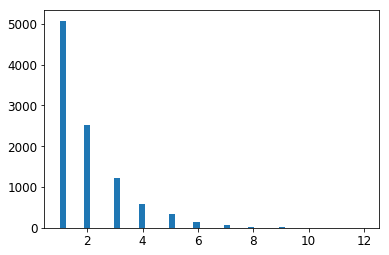

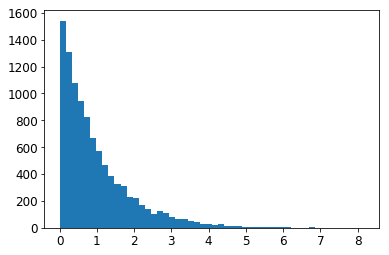

In [118]:
from scipy.stats import geom, expon

geom_distribution = geom(0.5).rvs(10000, random_state=42)
expon_distribution = expon(scale=1).rvs(10000, random_state=42)

plt.hist(geom_distribution, bins=50)
plt.show()
plt.hist(expon_distribution, bins=50)
plt.show()